## Breast Cancer-Shahrzad Nikbakhtian

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import itertools
import sklearn
import copy
import functools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingClassifier
import seaborn as sb
from matplotlib import rcParams
from yellowbrick.classifier import ConfusionMatrix
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

## Access Data:
#### It retrieves data in the form of the Dataframe

In [2]:
df = pd.read_csv('data.csv')

## Reading Data and Exploration

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [6]:
df.shape

(4024, 16)

In [7]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [8]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

#### Most my data are categorical. data variable: Age Race Marital Status T Stage N Stage 6th Stage differentiate Grade A Stage Tumor Size Estrogen Status Progesterone Status Regional Node Examined Reginol Node Positive Survival Months Status

In [9]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [11]:
numerical=[]
categorical=[]
for c in df:
    if df[c].dtype=='object':
        print(c, ':\n\t', df[c].unique())
        if c!='Status':
            categorical.append(c)
    elif df[c].dtype=='int64':
        numerical.append(c)
print('\n')
for c in numerical:
    print(c, 
          #"mean: ", df[c].mean(), ", mode: ", df[c].mode(),
          ", skew: ", df[c].skew())

Race :
	 ['White' 'Black' 'Other']
Marital Status :
	 ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
T Stage  :
	 ['T1' 'T2' 'T3' 'T4']
N Stage :
	 ['N1' 'N2' 'N3']
6th Stage :
	 ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate :
	 ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade :
	 ['3' '2' '1' ' anaplastic; Grade IV']
A Stage :
	 ['Regional' 'Distant']
Estrogen Status :
	 ['Positive' 'Negative']
Progesterone Status :
	 ['Positive' 'Negative']
Status :
	 ['Alive' 'Dead']


Age , skew:  -0.2203727859678868
Tumor Size , skew:  1.7397498006705898
Regional Node Examined , skew:  0.8292737694534275
Reginol Node Positive , skew:  2.702535859800024
Survival Months , skew:  -0.589998326716996


## Plot (visualization)

<AxesSubplot:>

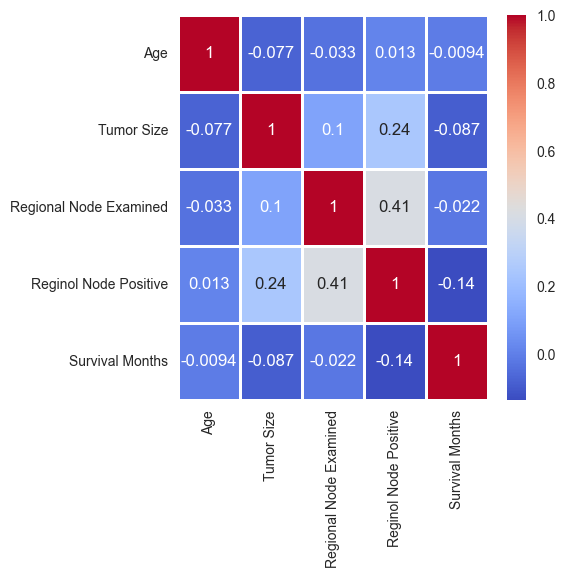

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', linewidths=2)

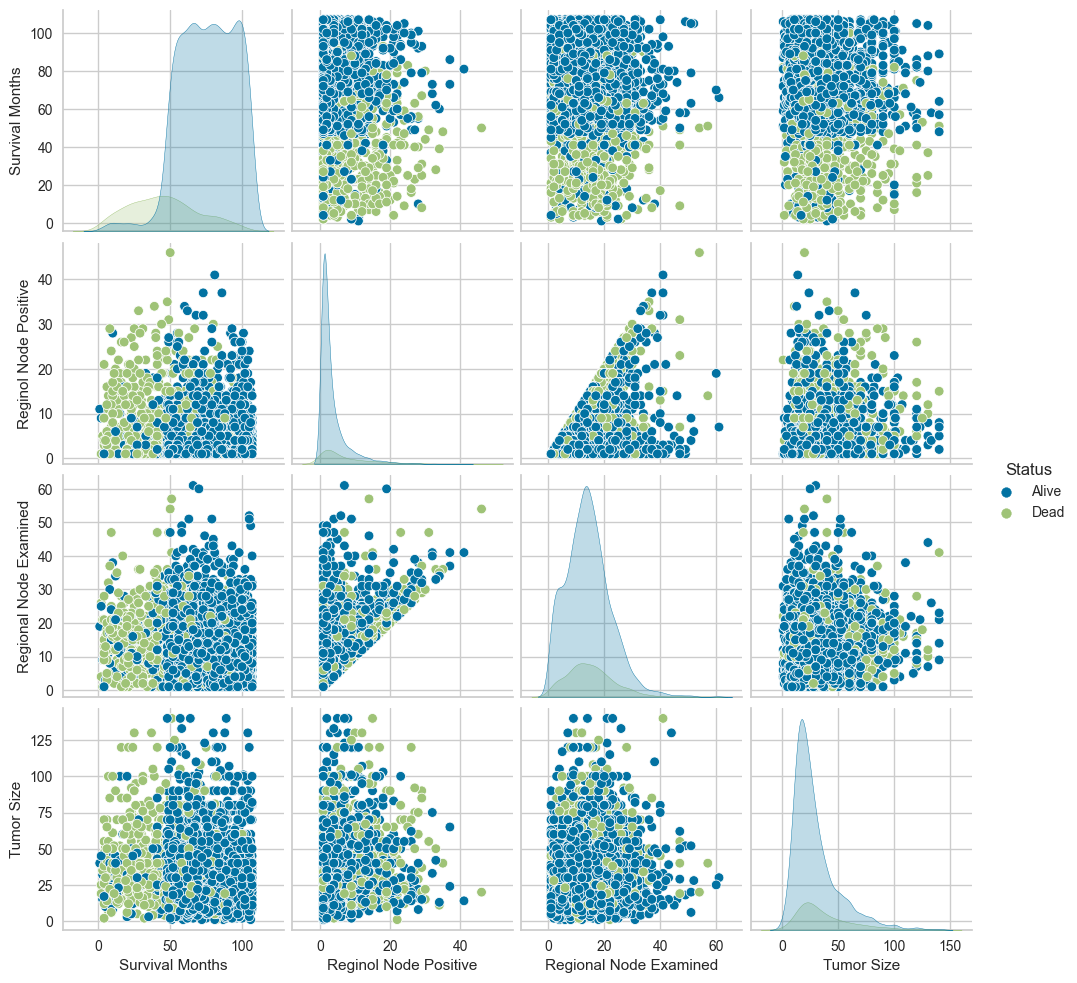

In [13]:
sns.pairplot(df, hue='Status',vars=['Survival Months','Reginol Node Positive','Regional Node Examined','Tumor Size'])

In [14]:
df[df.duplicated()].shape[0]

1

In [15]:
df[df.duplicated(keep=False)]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


In [16]:
df.drop_duplicates(inplace=True)
df[df.duplicated()].shape[0]

0

# Preprocessing

In [17]:
#I applied this transform to the columns that are highly skewed
skewed = ['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']

df_log = df[skewed].apply(lambda x: np.log(x + 1))

df.drop(skewed , axis=1, inplace=True)
df = pd.concat([df, df_log], axis=1)

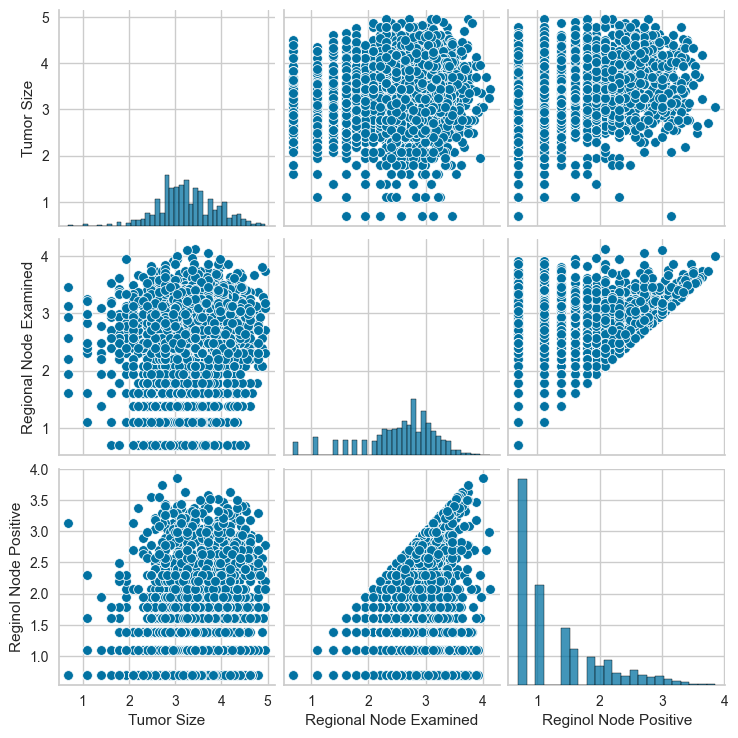

In [18]:
sb.pairplot(df_log)

In [19]:
df.describe()

,Age,Survival Months,Tumor Size,Regional Node Examined,Reginol Node Positive
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,71.301765,3.256368,2.562002,1.340382
std,8.963118,22.923009,0.624371,0.641205,0.704221
min,30.000000,1.000000,0.693147,0.693147,0.693147
25%,47.000000,56.000000,2.833213,2.302585,0.693147
50%,54.000000,73.000000,3.258097,2.708050,1.098612
75%,61.000000,90.000000,3.663562,2.995732,1.791759
max,69.000000,107.000000,4.948760,4.127134,3.850148


# Counterplot

In [20]:
df['Status'].value_counts()

Alive    3407
Dead      616
Name: Status, dtype: int64

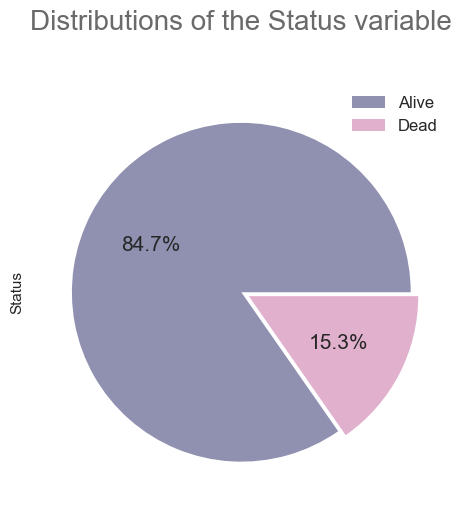

In [21]:
#from 'https://www.kaggle.com/code/vainero/breast-cancer-diagnosis-logistic-regression'

df['Status'].value_counts().plot(kind='pie', labels = ['', ''], autopct = '%1.1F%%', colors = ['#9091b1','#e1b0cd'], 
                                    explode = [0,0.05], textprops = {'fontsize':15})
plt.legend(labels=['Alive', 'Dead'], fontsize=12)
plt.title('Distributions of the Status variable\n', fontsize=20, color = '#6a6a6a', y=1.03)
plt.show()

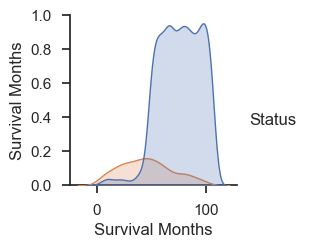

In [22]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue='Status',vars=['Survival Months'])


In [23]:
SurvivalMonths = df["Survival Months"]
#SurvivalMonths.head()

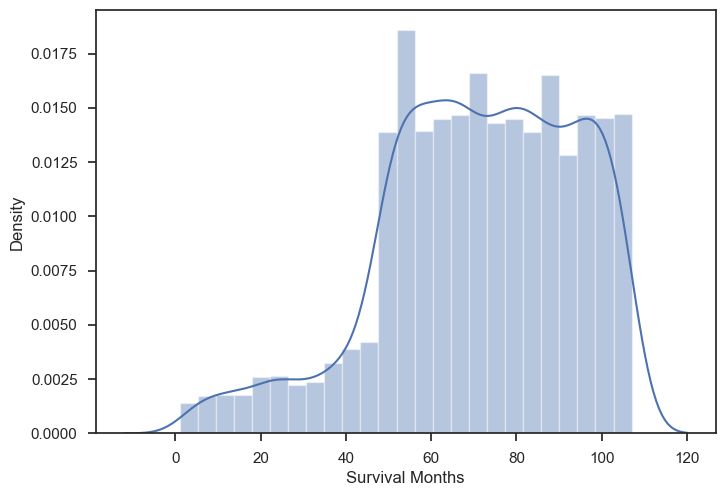

In [24]:
sns.distplot(SurvivalMonths);

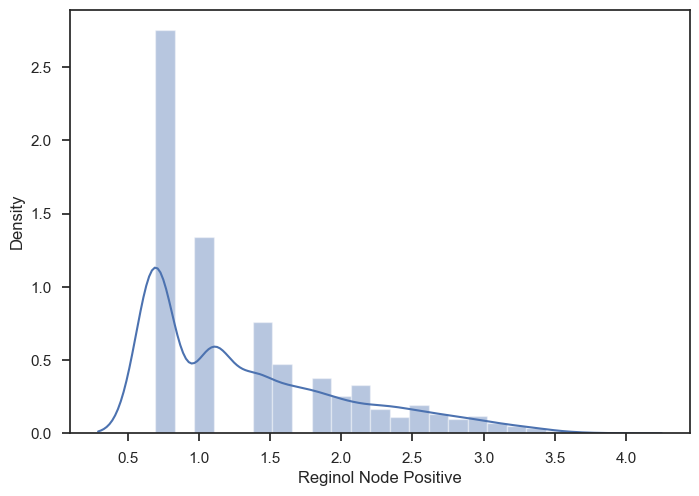

In [25]:
RegionalPositive = df["Reginol Node Positive"]
sns.distplot(RegionalPositive);

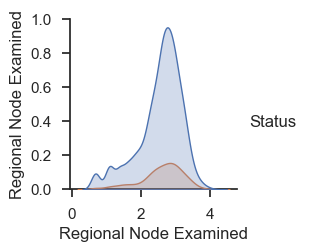

In [26]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue='Status',vars=["Regional Node Examined"])

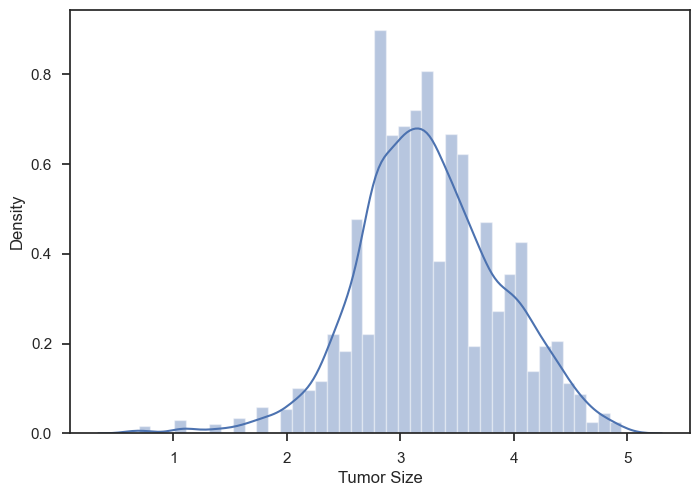

In [27]:
TumorSize= df["Tumor Size"]
sns.distplot(TumorSize);

In [28]:
df.value_counts('Status')

Status
Alive    3407
Dead      616
dtype: int64

In [29]:
def is_what_percent_of(num):
    return (num * 100) / 4023

num= 3407
a= 'The Average of "Alive" is: '

print('{}{}'.format(a,c))
num= 616
b='The Average of "Dead" is: '
c= is_what_percent_of(num)
print('{}{}'.format(a,c))

The Average of "Alive" is: Survival Months
The Average of "Alive" is: 15.311956251553568


# Normalizetion

In [30]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

df[numerical] = scaler.fit_transform(df[numerical])

In [31]:
df[numerical].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,0.614613,0.602315,0.544223,0.205016,0.663224
std,0.229824,0.146717,0.186723,0.223066,0.216255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.435897,0.502881,0.468679,0.000000,0.518868
50%,0.615385,0.602722,0.586753,0.128434,0.679245
75%,0.794872,0.697999,0.670528,0.347992,0.839623
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Remove Age feature

In [32]:
#df= df.drop(['Age'], axis=1)

## The target varaible should be mapped into 1 and 0.

In [33]:
df['Status'] = df['Status'].map({'Alive': 1, 'Dead': 0})

#???

In [34]:
a = np.array(df['Status'])
b = np.array(df['Survival Months'])

In [35]:
a

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
c =[ ]
for i in range(len(a)):
    if b[i] > 0.3 or a[i] == 0:
        if a[i] == 1:
            c.append(1)
        if a[i] == 0 and b[i] > 0.3:
            c.append(1)
        if a[i] == 0 and b[i] < 0.3:
            c.append(0)
     
    else:
        c.append(np.nan)
        
# add new vector c to your database
# use pandas to remove nan values

## All categorical features should be one-hot encoded.

In [37]:
df = pd.get_dummies(df)

In [38]:
df.head()

,Age,Survival Months,Status,Tumor Size,Regional Node Examined,Reginol Node Positive,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T1,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N1,N Stage_N2,N Stage_N3,6th Stage_IIA,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,0.974359,0.556604,1,0.215313,0.735509,0.000000,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
1,0.512821,0.575472,1,0.679191,0.586753,0.347992,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
2,0.717949,0.698113,1,0.814392,0.586753,0.439118,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1
3,0.717949,0.783019,1,0.529017,0.118074,0.000000,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
4,0.435897,0.462264,1,0.715413,0.201849,0.000000,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1


# Data preprocessing

In [39]:
target = df.Status
df.drop(['Status'] , axis=1, inplace=True)

## Split the data into training set and testing set.

In [40]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3218 samples.
Testing set has 805 samples.


In [41]:
X_test.head()

,Age,Survival Months,Tumor Size,Regional Node Examined,Reginol Node Positive,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T1,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N1,N Stage_N2,N Stage_N3,6th Stage_IIA,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
1719,0.410256,0.273585,0.488635,0.566662,0.000000,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
1205,0.358974,0.679245,0.726345,0.623202,0.290241,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
2723,0.820513,0.849057,0.488635,0.545081,0.000000,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0
1938,0.384615,0.518868,0.741844,0.521772,0.290241,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
1227,0.282051,0.575472,0.665759,0.201849,0.000000,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1


In [42]:
X_train.head()

,Age,Survival Months,Tumor Size,Regional Node Examined,Reginol Node Positive,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T1,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N1,N Stage_N2,N Stage_N3,6th Stage_IIA,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
2666,0.717949,0.462264,0.439843,0.521772,0.128434,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1
3296,0.435897,0.962264,0.709751,0.566662,0.290241,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
2139,0.538462,0.216981,0.552535,0.521772,0.439118,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
1420,0.641026,0.518868,0.473470,0.639846,0.539990,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1
283,0.512821,0.858491,0.563467,0.545081,0.128434,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1


In [43]:
y_train.head()

2666    1
3296    1
2139    0
1420    0
283     1
Name: Status, dtype: int64

In [44]:
y_test.head()

1719    1
1205    1
2723    1
1938    1
1227    1
Name: Status, dtype: int64

In [45]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [46]:
# from 'https://www.kaggle.com/code/vainero/breast-cancer-diagnosis-logistic-regression'
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m' 

   
plt.rc('figure',figsize=(20,11))

# Logestic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr_classifier= LogisticRegression()
lr_classifier.fit(X_train,y_train)
y_pred_lr=lr_classifier.predict(X_test)
y_pred_train = lr_classifier.predict(X_train)

accuracy_score(y_test,y_pred_lr)
y_score = lr_classifier.decision_function(X_test)
score = lr_classifier.score(X_test, y_test)
print(clr.S+'Prediction Accuracy:'+clr.E, accuracy_score(y_test, y_pred_lr))

Prediction Accuracy: 0.8981366459627329


In [48]:
y_pred_train = lr_classifier.predict(X_train)
print('Training set score: {:.5f}'.format(lr_classifier.score(X_train, y_train)))

print('Test set score: {:.5f}'.format(lr_classifier.score(X_test, y_test)))

Training set score: 0.89590
Test set score: 0.89814


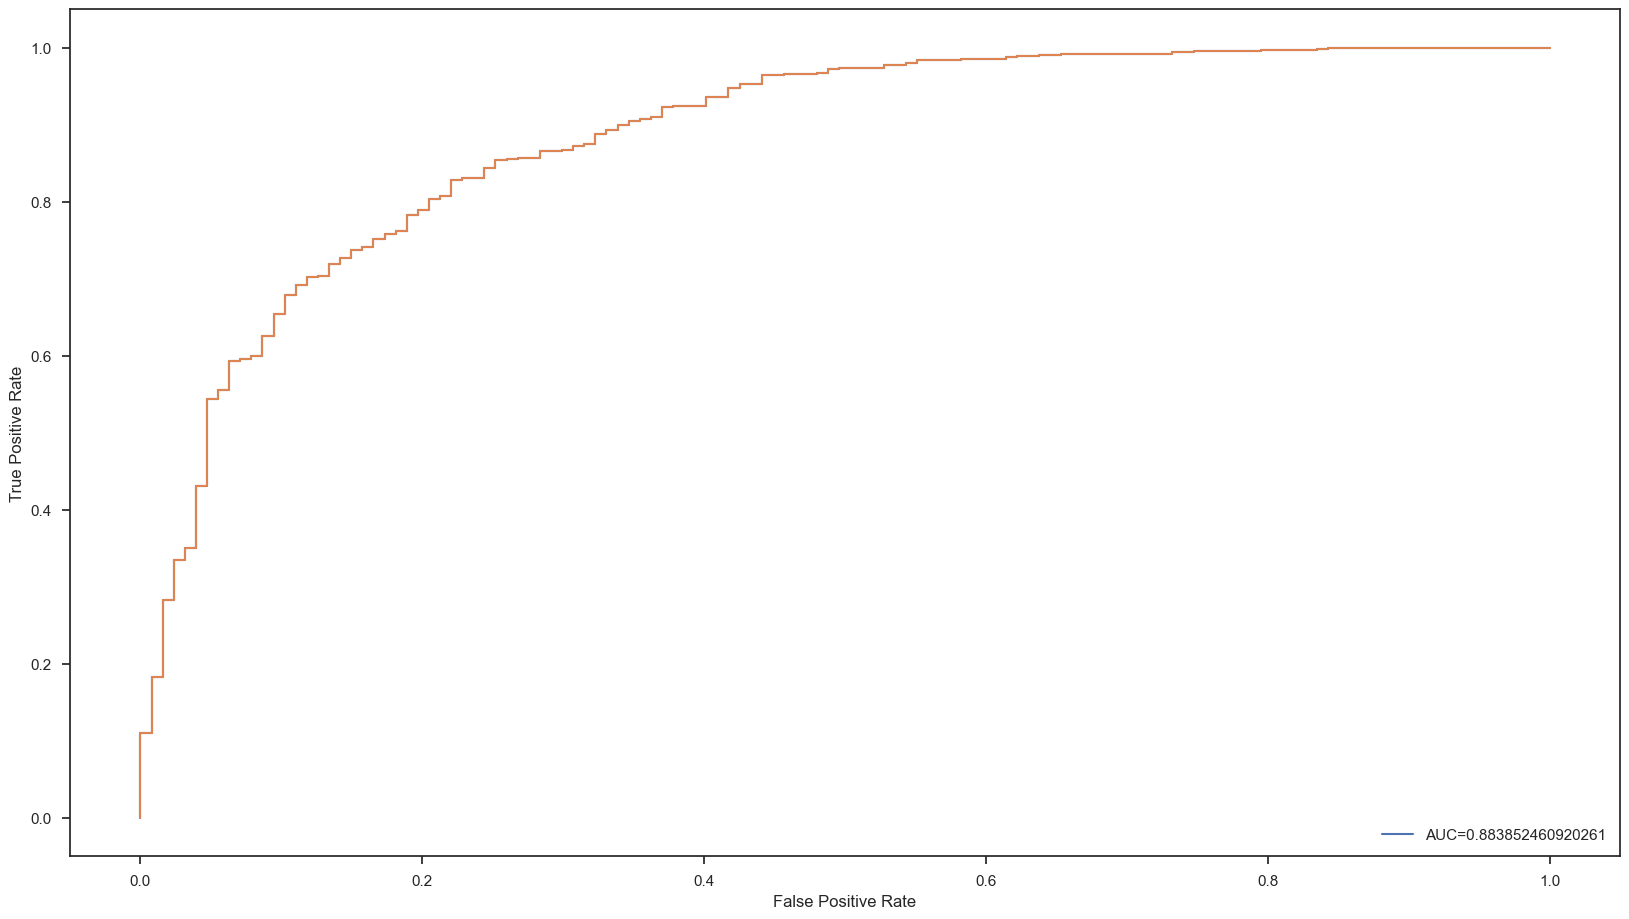

In [49]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn import metrics
y_pred_proba = lr_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [50]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.44      0.58       127
           1       0.90      0.98      0.94       678

    accuracy                           0.90       805
   macro avg       0.87      0.71      0.76       805
weighted avg       0.89      0.90      0.88       805



# Confusion Matrix

[[ 56  71]
 [ 11 667]]


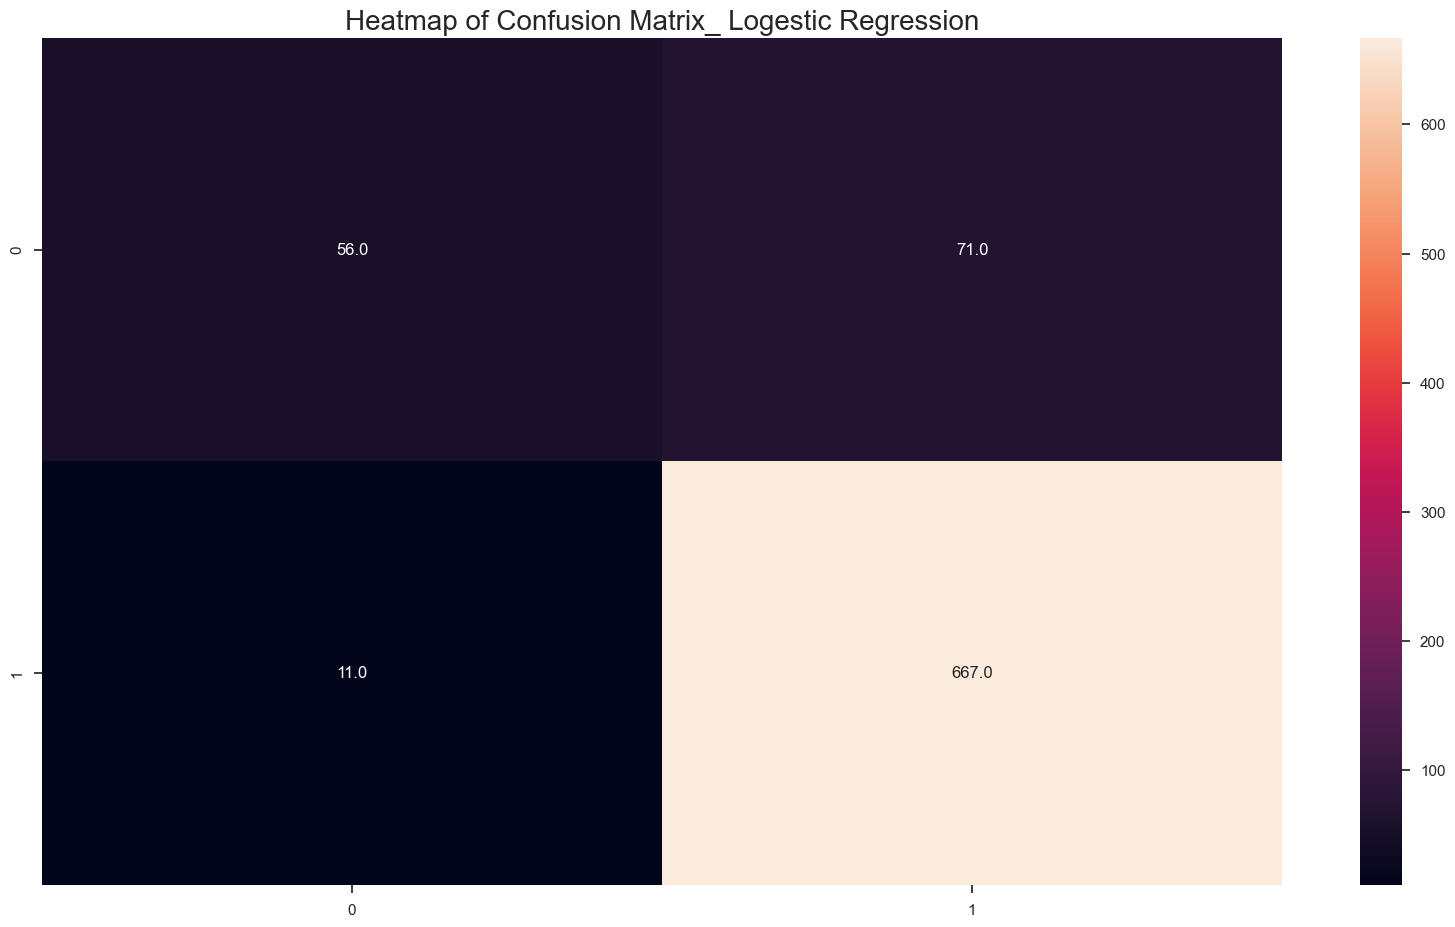

In [51]:
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)
plt.title("Heatmap of Confusion Matrix_ Logestic Regression",fontsize=20)
sns.heatmap(cm,annot=True, fmt=".1f")
plt.show()

# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier= DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

#y_score_dt = dt_classifier.decision_function(X_test)
score = dt_classifier.score(X_test, y_test)
print(clr.S+'Prediction Accuracy:'+clr.E, accuracy_score(y_test, y_pred_dt))



Prediction Accuracy: 0.84472049689441


In [53]:
y_pred_train = dt_classifier.predict(X_train)
print('Training set score: {:.5f}'.format(dt_classifier.score(X_train, y_train)))

print('Test set score: {:.5f}'.format(dt_classifier.score(X_test, y_test)))

Training set score: 1.00000
Test set score: 0.84472


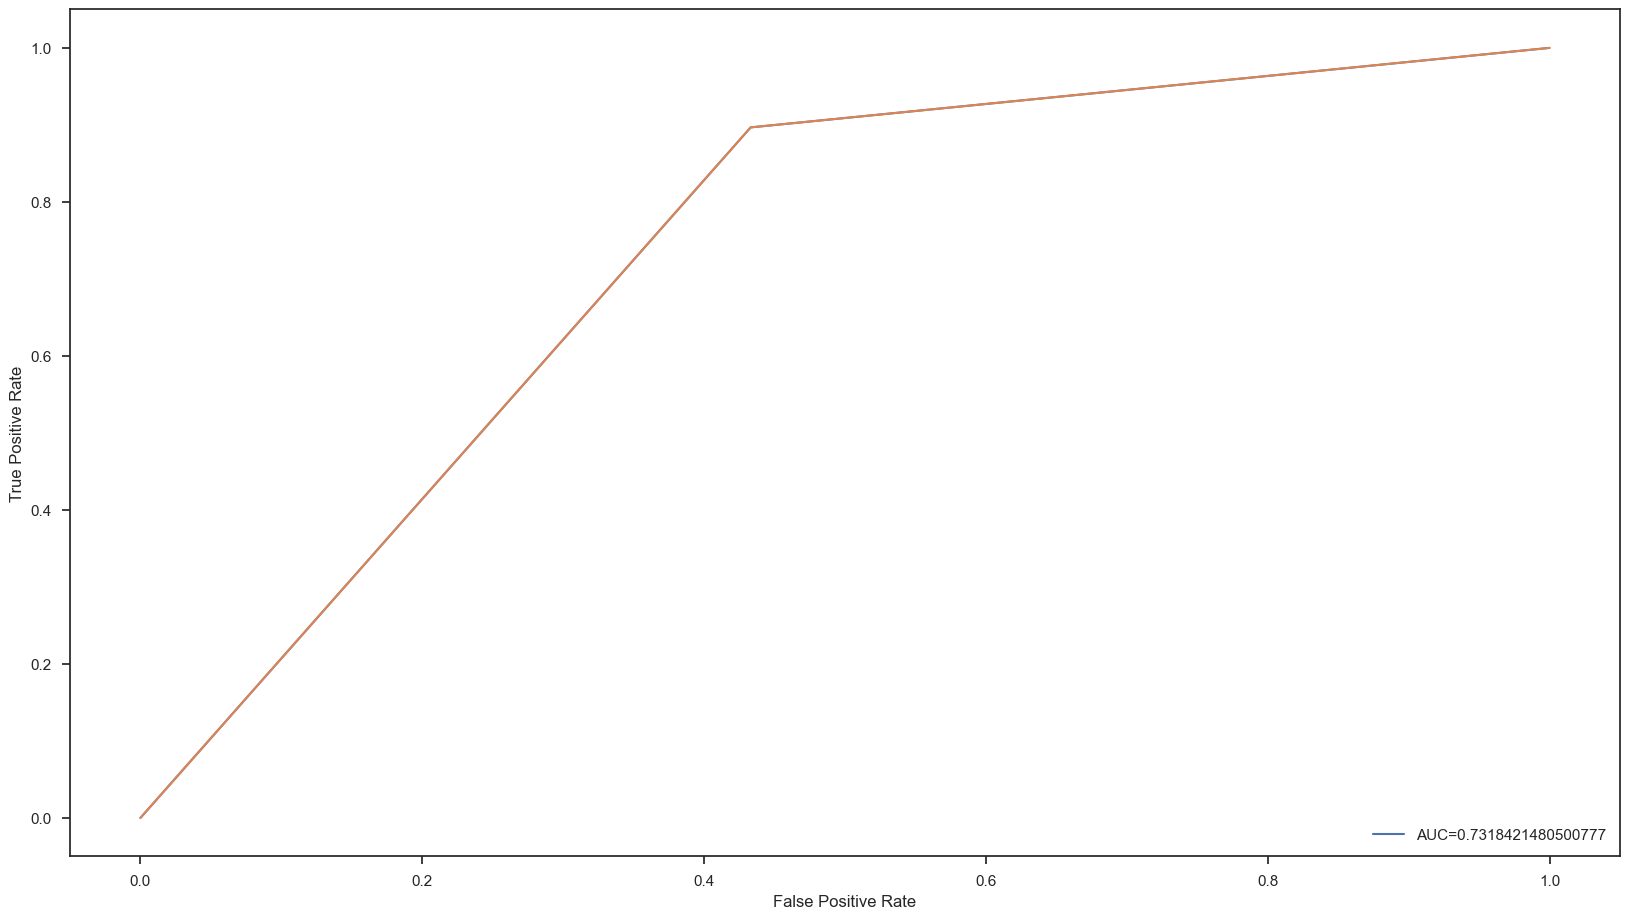

In [54]:
from sklearn import metrics
y_pred_proba = dt_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [55]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       127
           1       0.92      0.90      0.91       678

    accuracy                           0.84       805
   macro avg       0.71      0.73      0.72       805
weighted avg       0.85      0.84      0.85       805



In [56]:
model= DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [57]:
print(model.feature_importances_)

[9.85809377e-02 4.50192198e-01 9.22280484e-02 9.87546127e-02
 6.11329813e-02 1.15371450e-02 4.22050512e-03 1.30397993e-03
 8.59716866e-03 1.34987071e-02 1.55016131e-03 1.22396894e-02
 4.46034020e-03 0.00000000e+00 1.02485536e-02 3.78794578e-03
 4.37441344e-03 2.38995219e-02 6.75066327e-03 2.80740563e-03
 3.61426581e-03 6.26336654e-03 1.20063529e-02 1.30216916e-03
 0.00000000e+00 6.64534856e-03 8.58236771e-03 1.60761624e-03
 4.01904061e-04 0.00000000e+00 6.57437165e-03 6.02856092e-04
 5.31543016e-03 0.00000000e+00 2.00952031e-03 1.64128729e-02
 1.31288660e-03 6.77192013e-03 1.04117725e-02]


<AxesSubplot:>

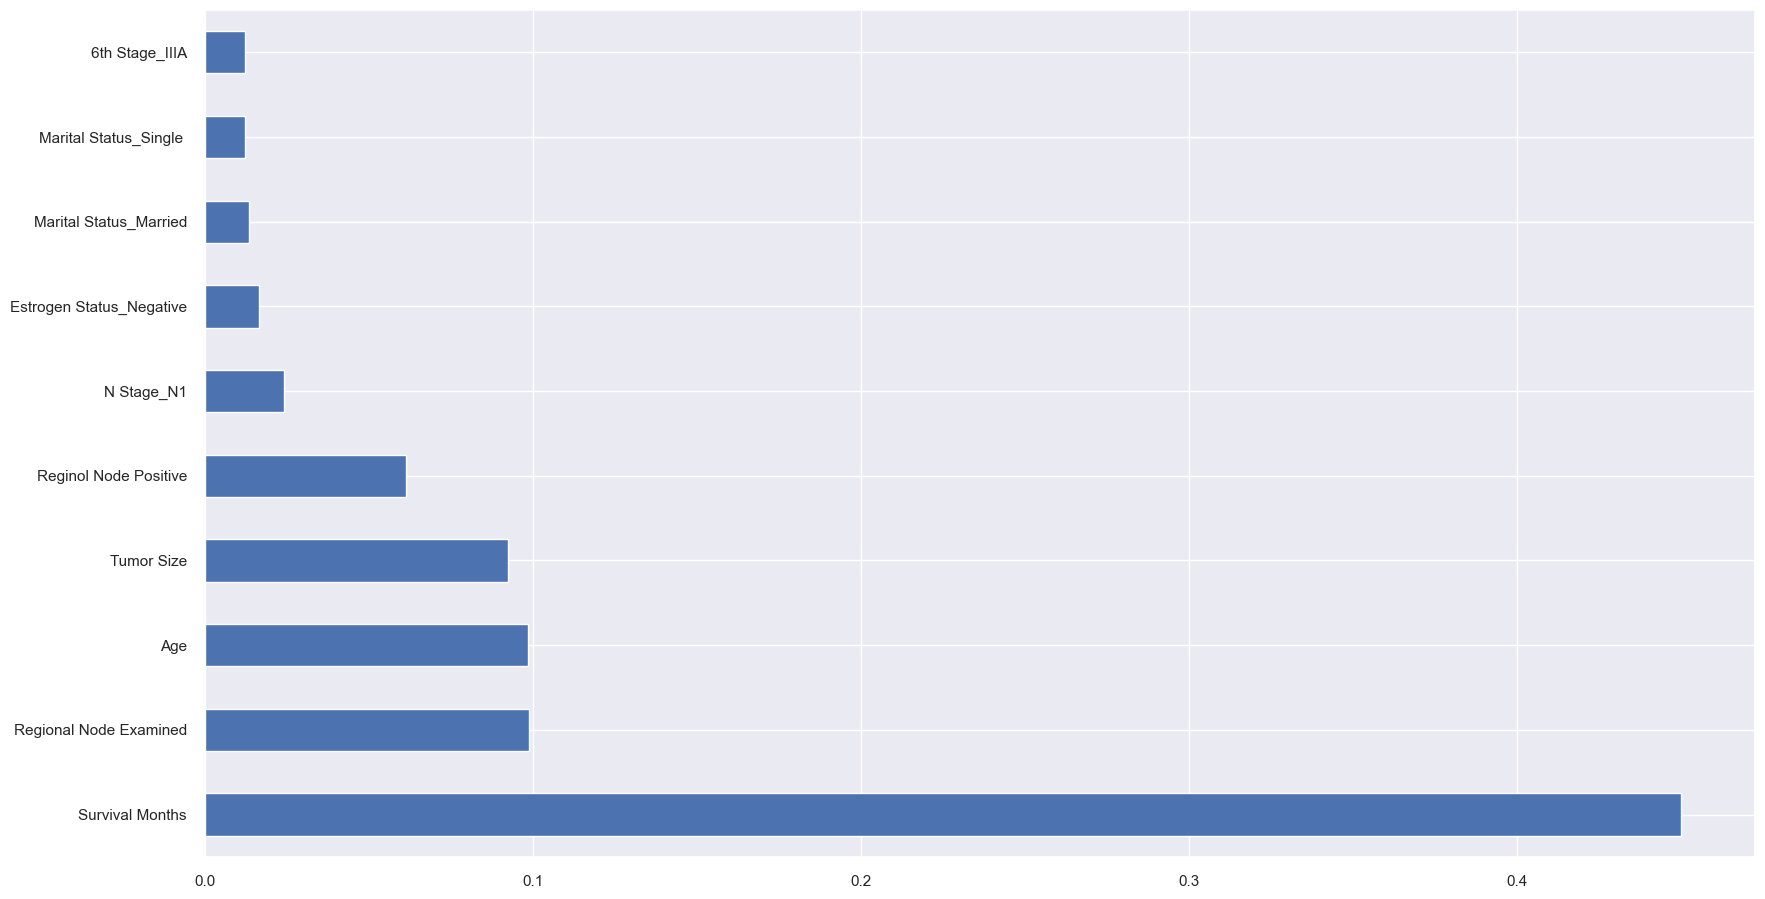

In [58]:
sns.set()
feat_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feat_importances.nlargest(10).plot(kind='barh')

# K- Nearest Neighbour Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
y_pred_knn=knn_classifier.predict(X_test)
accuracy_score(y_test,y_pred_knn)
print(clr.S+'Prediction Accuracy:'+clr.E, accuracy_score(y_test, y_pred_knn))

Prediction Accuracy: 0.8645962732919255


In [60]:
y_pred_train = knn_classifier.predict(X_train)
print('Training set score: {:.5f}'.format(knn_classifier.score(X_train, y_train)))

print('Test set score: {:.5f}'.format(knn_classifier.score(X_test, y_test)))

Training set score: 0.88875
Test set score: 0.86460


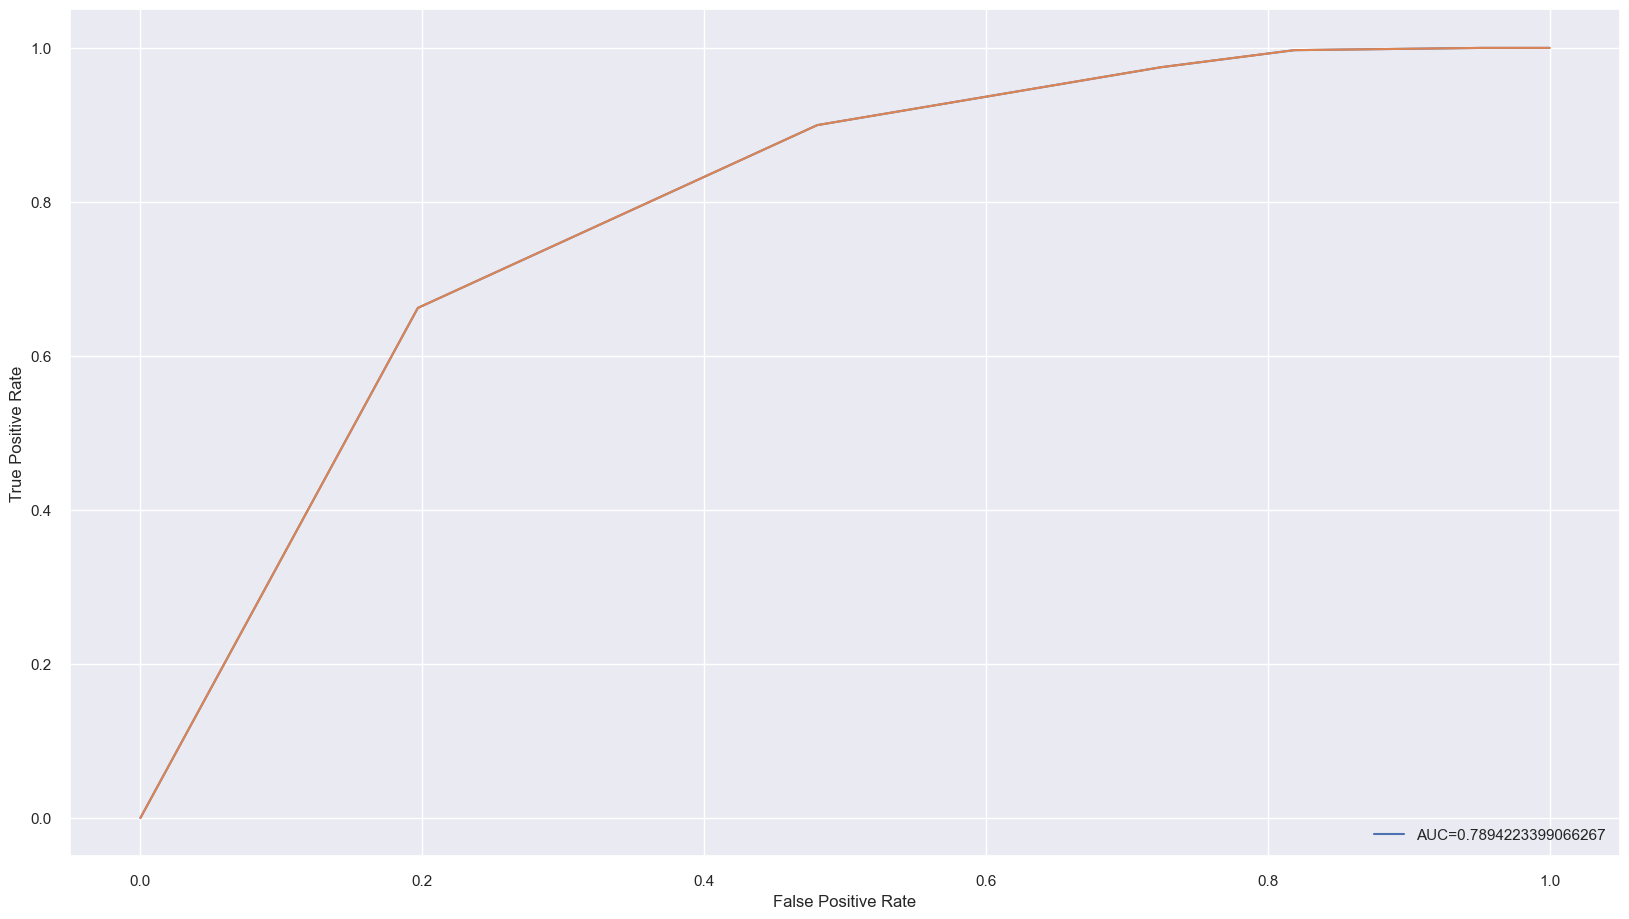

In [61]:
y_pred_proba = knn_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [62]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.28      0.39       127
           1       0.88      0.97      0.92       678

    accuracy                           0.86       805
   macro avg       0.78      0.63      0.66       805
weighted avg       0.85      0.86      0.84       805



# Support Vector Classifier

In [63]:
from sklearn.svm import SVC
svc_classifier=SVC()
svc_classifier.fit(X_train,y_train)
y_pred_scv=svc_classifier.predict(X_test)
y_pred_scv=svc_classifier.predict(X_test)
accuracy_score(y_test,y_pred_scv)
print(clr.S+'Prediction Accuracy:'+clr.E, accuracy_score(y_test, y_pred_scv))

Prediction Accuracy: 0.8832298136645963


In [64]:
y_pred_train = svc_classifier.predict(X_train)
print('Training set score: {:.5f}'.format(svc_classifier.score(X_train, y_train)))

print('Test set score: {:.5f}'.format(svc_classifier.score(X_test, y_test)))

Training set score: 0.88813
Test set score: 0.88323
